분류 실습 : 캐글 신용카드 사기 검출

- Kaggle의 신용카드 데이터 세트를 이용해 신용카드 사기 검출 분류 실습  


- 데이터 다운로드 : https://www.kaggle.com/mlg-ulb/creditcardfraud  
credit card fraud

![image.png](attachment:image.png)

## Credit Card Fraud Detection ML 모델 구축
- 다양한 Feature Engineering 방식을 
- Logistic Regression과 LightGBM 방식을 이용하여 
- 각 방식에 적용 후 평가 비교

### Feature Engineering 
- 피처들 중 어떤 것이 모델링할 때 중요한 것인지 결정하는 과정
- 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 굉장히 중요한 단계이며
- 전문성과 시간과 비용이 많이 드는 작업
- Feature Selection, Feature Extraction
- PCA 방식 사용

### 차원 축소
- 많은 피처로 구성된 다차원의 데이터 셋을
- 차원을 축소하여 새로원 차원의 데이터 세트를 생성하는 것

**PCA(Principal Component Analysis) : 주성분 분석**
- 대표적인 차원 축소 알고리즘
- 여러 변수 간 존재하는 상관관계를 이용해 
- 대표하는 주성분을 추출해서 차원을 축소하는 기법
- 간단하게 가장 높은 분산을 가지는 데이터의 축을 찾아 차원을 축소

### Log 변환
- 비대칭된 분포도를 가진 데이터 세트를 정규분포와 같이 대칭으로 변환하는 방식

![image.png](attachment:image.png)

### 이상치 탐지
- IQR(Inter Quantile Range), 사분위수(Quantile), Boxplot을 이용
    - 최대값 : 3분위수 + 1.5 * IQR
    - 최소값 : 1분위수 - 1.5 * IQR    

![image-2.png](attachment:image-2.png)

## imbalanced data set 가공을 위한 언더 샘플링/오버 샘플링

- 언더 샘플링(under sampling)
    - 많은 레이블을 가진 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식

- 오버 샘플링(over sampling)
    - 적은 레이블을 가진 데이터 세트를 많은 데이터 세트 수준으로 증식시키는 방식
    - 원본 데이터의 피처 값들을 약가만 변경하여 증식
    - 대표적인 방법이 SMOTE

![image-2.png](attachment:image-2.png)

### SMOTE(Synthetic Minority Over-sample Technique)
- 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbor)을 찾고,
- K개 이웃들과의 차이를 일정 값으로 만들어서
- 기존 데이터와 약간 차이가 나는 새로운 데이터 생성

![image-2.png](attachment:image-2.png)

### SMOTE 방식을 제공하는 패키지
- imblearn.over_sampling (imbalanced learn)  
- imbalanced-learn 설치 필요  
    - Anaconda Prompt를 관리자 권한으로 실행시키고 설치  
    - **`conda install -c conda-forge imbalanced-learn`**  
    - 중간에 y 입력

## 데이터 일차 가공 및 모델 학습/예측/평가

### 'creditcard.csv' 파일 데이터 로드

In [1]:
import lightgbm
lightgbm.__version__

'3.2.1'

**creditcard 피처 정보**
- Time : 데이터 생성 관련한 속성으로 분석에 큰 의미가 없음 => 삭제
- Amount : 신용카드 트랜잭션 금액
- Class : 레이블, 0-정상, 1-사기

### 전처리 함수 ① : get_preprocessed_df() 작성 
- 원본 DataFrame은 유지하고 데이터 가공을 위한 DataFrame을 복사하여 반환

In [2]:
from lightgbm import LGBMClassifier

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, 
                                                  random_state=156 )

In [4]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# 학습
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,
                 eval_metric='logloss',eval_set=evals,verbose=True)
# 예측
pred=lgbm_wrapper.predict(X_test)
# 확률값 받아오기
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [6]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

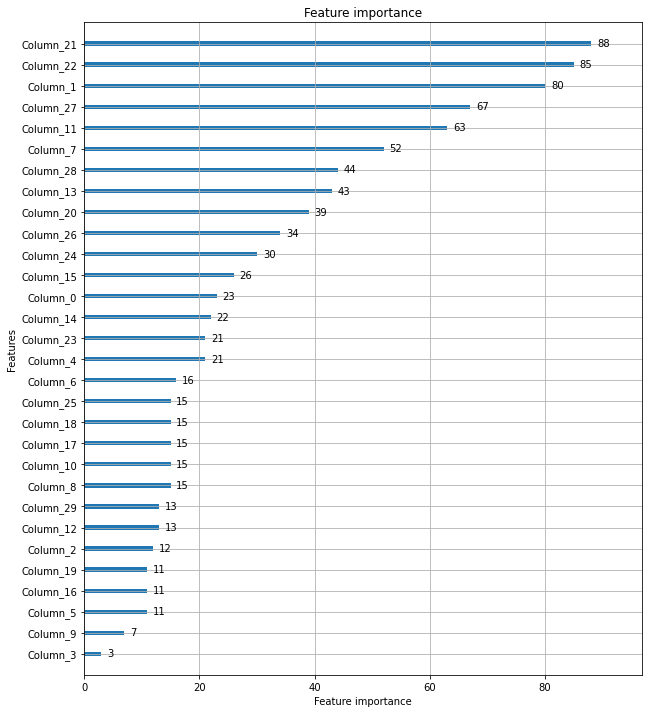

In [7]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    start,end=plt.xlim()
    
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [10]:
card_df.shape

(284807, 31)

In [11]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

In [13]:
def get_train_test_dataset(df=None):
    
    df_copy=get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    
    X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.3,
                                                     random_state=0,stratify=y_target)
    
    return  X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [14]:
X_test.shape

(85443, 29)

In [15]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('검증 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
검증 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [16]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()

lr_clf.fit(X_train,y_train)

lr_pred=lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,F1: 0.7294, AUC:0.9650


In [17]:
def get_model_train_eval(model,ftr_train=None,ftr_test=None,tgt_train=None,tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred=model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    
    get_clf_eval(tgt_test,pred,pred_proba)

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)


오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,F1: 0.8453, AUC:0.9790


- 히트맵에서 cmap을 'RdBu'로 설정해
    - 양의 상관관계가 높을수록 색깔이 진한 파란색에 가깝고,
    - 음의 상관관계가 높을수록 색깔이 진한 빨강색에 가깝게 표현됨

=> 레이블 Class와 상관관계가 가장 높은 피처는 V14와 V17 (음의 상관관계)

### 이상치 필터링을 위한 함수 작성 : get_outlier()
- Dataframe에서 outlier에 해당하는 데이터를 필터링
- outlier 레코드의 index를 반환함


<AxesSubplot:xlabel='Amount', ylabel='Density'>

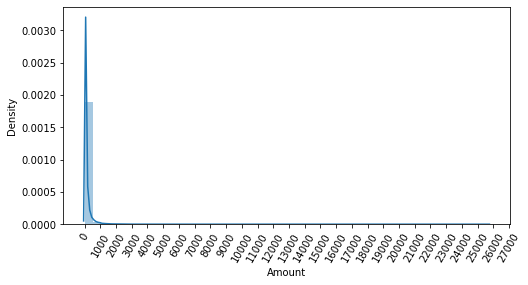

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])


In [20]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    df_copy.insert(0,'Amount_Scaled',amount_n)
    
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy

In [21]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [22]:
print('### 로지스틱 회귀 예측 성능 ###')

lr_clf=LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)

print('### LGBM 회귀 예측 성능 ###')

lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,F1: 0.7143, AUC:0.9702
### LGBM 회귀 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,F1: 0.8409, AUC:0.9779


In [23]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
#     scaler = StandardScaler()
    amount_n = np.log1p(df_copy['Amount'].values.reshape(-1,1))
    
    df_copy.insert(0,'Amount_Scaled',amount_n)
    
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy

In [24]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')

lr_clf=LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)

print('### LGBM 회귀 예측 성능 ###')

# lgbm_clf=LGBMClassifier()
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,F1: 0.7149, AUC:0.9727
### LGBM 회귀 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,F1: 0.8496, AUC:0.9796


<AxesSubplot:>

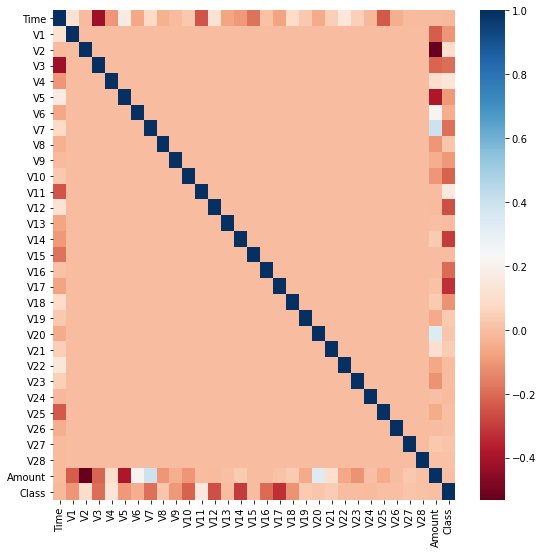

In [25]:
plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [26]:
def get_outlier(df=None, column = None, weight = 1.5):
    fraud=df[df['Class']==1][column]
    quantile_25=np.percentile(fraud.values,25)
    quantile_75=np.percentile(fraud.values,75)
    iqr=quantile_75-quantile_25
    iqr_weingt=iqr*weight
    lowest_val = quantile_25 - iqr_weingt
    highest_val = quantile_75 + iqr_weingt
    
    outlier_inedx=fraud[(fraud < lowest_val) |(fraud > highest_val) ].index
    return outlier_inedx

In [27]:
outlier_index = get_outlier(df=card_df,column='V14')
print('이상치 인텍스: ', outlier_index)

이상치 인텍스:  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [28]:
card_df['V14'][8296]

-19.2143254902614

<Figure size 576x288 with 0 Axes>

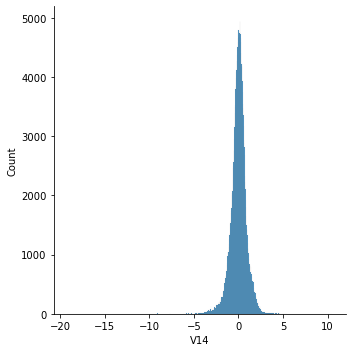

In [29]:
plt.figure(figsize=(8,4))
sns.displot(card_df['V14'])

In [30]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
#     scaler = StandardScaler()
    amount_n = np.log1p(df_copy['Amount'].values.reshape(-1,1))
    
    df_copy.insert(0,'Amount_Scaled',amount_n)
    
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    
    outlier_index = get_outlier(df=card_df,column='V14',weight=1.5)
    df_copy.drop(outlier_index,axis=0,inplace=True)
    return df_copy


X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')

lr_clf=LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)

print('### LGBM 회귀 예측 성능 ###')

# lgbm_clf=LGBMClassifier()
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,F1: 0.7597, AUC:0.9743
### LGBM 회귀 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,F1: 0.8897, AUC:0.9780


In [32]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=0) 

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 전체 데이터 : 284,807 
# 테스트 : 30 %, train : 70 %
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())



SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ',X_train.shape,y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ',X_train_over.shape,y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n ',pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
  0    199020
1    199020
Name: Class, dtype: int64


In [34]:
lr_clf=LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=X_train_over,ftr_test=X_test,
                     tgt_train=y_train_over,tgt_test=y_test)


오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,F1: 0.1023, AUC:0.9737


**Precision-Recall 곡선 시각화**

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


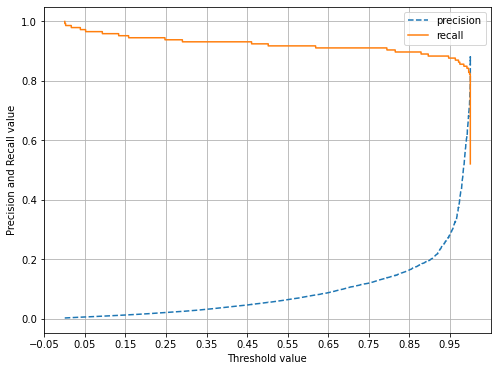

In [36]:
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [ ]:
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train_over,ftr_test=X_test,
                     tgt_train=y_train_over,tgt_test=y_test)